# Géométrie et espaces de formes - TP 1
## by: Bazaz Samuel

## 1. Noyaux reproduisants et interpolation


### Noyaux reproduisants

Soit $H$ un espace de Hilbert de fonctions $f:{\mathbb R}^d\rightarrow{\mathbb R}$. $H$ est un espace à noyau reproduisant s'il existe une fonction
$K_H:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ telle que $\forall x\in{\mathbb R}^d, K_H(\cdot,x)\in H$, et

$$ \forall f\in H,\quad\forall x\in{\mathbb R}^d,\quad f(x)=\langle{K_H(\cdot,x)},f\rangle_H.$$

$K_H$ est alors défini de façon unique et est appelé noyau reproduisant de $H$. On peut remarquer que l'on a la propriété suivante (propriété reproduisante) :

$$\forall x,y\in{\mathbb R}^d,\quad \langle K_H(\cdot,x),K_H(\cdot,y)\rangle_H=K_H(x,y).$$

Inversement, il est possible, à partir d'une fonction $K:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ de type positif, de construire l'unique espace de Hilbert $H$ de fonctions tel que $K_H=K$.

### Un premier exemple : espace de Sobolev $H^1({\mathbb R})$

L'espace de Sobolev $H^1({\mathbb R})$ est l'espace des fonctions de $L^2({\mathbb R})$ dont la dérivée au sens faible appartient aussi à $L^2({\mathbb R})$. En fait tout élément de $H^1({\mathbb R})$ admet un représentant continu et on peut aussi définir $H^1({\mathbb R})$
de façon classique comme l'espace des fonctions $f:{\mathbb R}\rightarrow{\mathbb R}$ continues, de carré intégrable, dérivables presque partout et telles que $\int_x^yf'(t)dt=f(y)-f(x)$ pour tous réels $x,y$. Sur cet espace on définit habituellement le produit scalaire
$$\langle f,g\rangle_{H^1} = \int_{\mathbb R} f(t)g(t)+f'(t)g'(t)\;dt,$$
mais on peut aussi définir plus généralement pour une échelle $\sigma>0$ fixée,
$$\langle f, g\rangle_{H^1_\sigma} = \int_{\mathbb R} f(t)g(t)+\sigma^2f'(t)g'(t)\;dt.$$
On note $H^1_\sigma$ l'espace $H^1({\mathbb R})$ muni de ce produit scalaire. C'est un espace de Hilbert.

__Question 1__ : Montrer que $H^1_\sigma$ est un espace à noyau reproduisant dont le noyau est la fonction $K_\sigma:{\mathbb R}^2\rightarrow{\mathbb R}$ définie par

$$\forall x,y\in{\mathbb R},\quad K_\sigma(x,y)=\frac1{2\sigma}e^{-\frac{|x-y|}\sigma}.$$

En montrant que $K_\sigma(x,y)$ vérifie la propriété reproduisante pour $H_\sigma^1$, comme $H_\sigma^1$ est un Hilbert l'existence nous assure que c'est un ENR et l'unicité permet de conclure que le noyau associé est bien $K_\sigma(x,y)$.

On sépare l'intégrale en deux de manière à éliminer la valeur absolue.

$$
\begin{aligned}
\langle f, K(\cdot, x)\rangle_{H_\sigma^1} & =\int_{\mathbb{R}} f(t) K(t, x)+\sigma^2 f^{\prime}(t) K^{\prime}(t, x) d t \\
& =\int_{-\infty}^x \frac{1}{2 \sigma} f(t) e^{\frac{t-x}{\sigma}}+\sigma^2 f^{\prime}(t) \frac{1}{2 \sigma^2} e^{\frac{t-x}{\sigma}} d t+\int_x^{\infty} \frac{1}{2 \sigma} f(t) e^{\frac{x-t}{\sigma}}+\sigma^2 f^{\prime}(t) \frac{1}{2 \sigma^2} e^{\frac{x-t}{\sigma}} d t
\end{aligned}
$$

Puis on sépare les terme dependant de $ f(t) $  du reste on élimine les $ f^ {\prime}(t) $ par IPP:
$$
\begin{aligned}
\int_{-\infty}^x \frac{1}{2 \sigma} f(t) e^{\frac{t-x}{\sigma}}+\sigma^2 f^{\prime}(t) \frac{1}{2 \sigma^2} e^{\frac{t-x}{\sigma}} d t & =\frac{1}{2 \sigma} \int_{-\infty}^x \frac{1}{2 \sigma} f(t) e^{\frac{t-x}{\sigma}} d t+\frac{1}{2}\left(\left.|f(t) e^{\frac{t-x}{\sigma}}\right|_{-\infty} ^x-\int_{-\infty}^x \frac{1}{\sigma} f(t) e^{\frac{t-x}{\sigma}} d t\right) \\
& =\frac{1}{2} f(x) \\
\int_x^{\infty} \frac{1}{2 \sigma} f(t) e^{\frac{x-t}{\sigma}}+\sigma^2 f^{\prime}(t) \frac{1}{2 \sigma^2} e^{\frac{x-t}{\sigma}} d & =\frac{1}{2 \sigma} \int_x^{\infty} \frac{1}{2 \sigma} f(t) e^{\frac{x-t}{\sigma}} d t+\frac{1}{2}\left(\left.|f(t) e^{\frac{x-t}{\sigma}}\right|_x ^{\infty}-\int_x^{\infty} \frac{1}{\sigma} f(t) e^{\frac{x-t}{\sigma}} d t\right) \\
& =\frac{1}{2} f(x)
\end{aligned}
$$

On obtient à terme le bon résultat.

## Setup

In [1]:
############
# Packages #
############

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns

pio.renderers.default = "plotly_mimetype+notebook"

__Question 2__ : Vérifier numériquement la propriété du noyau : choisir par exemple $\sigma=2$, une fonction $f\in H^1_\sigma$ quelconque (par exemple $f(x)=e^{-x^2}$), un réel $x\in{\mathbb R}$ quelconque, puis calculer une valeur approchée de $\langle f, {K_\sigma(\cdot,x)}\rangle_{H^1_\sigma}$ par sommes et différences finies et comparer avec $f(x)$. Vérifier également numériquement la propriété reproduisante.

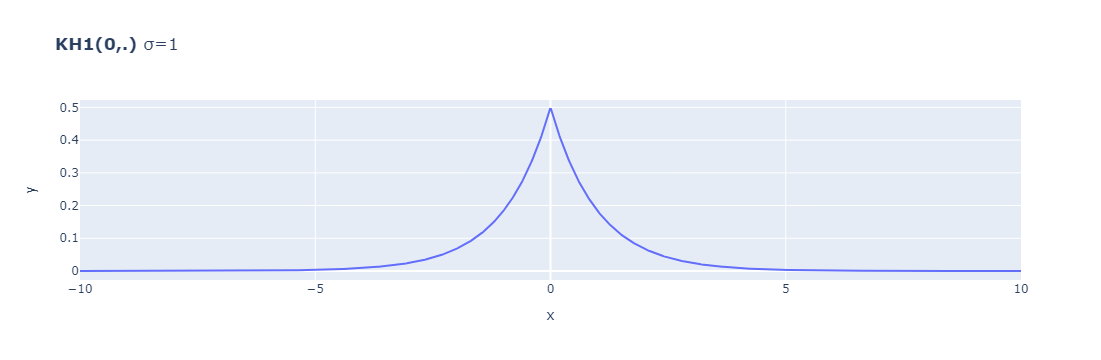

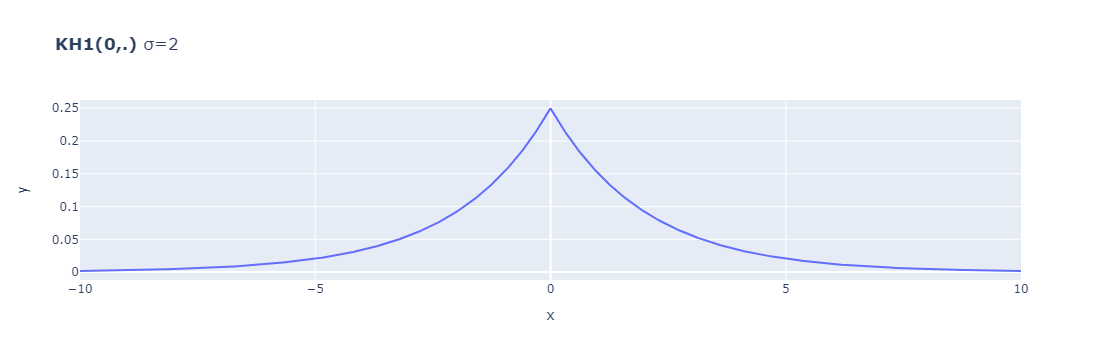

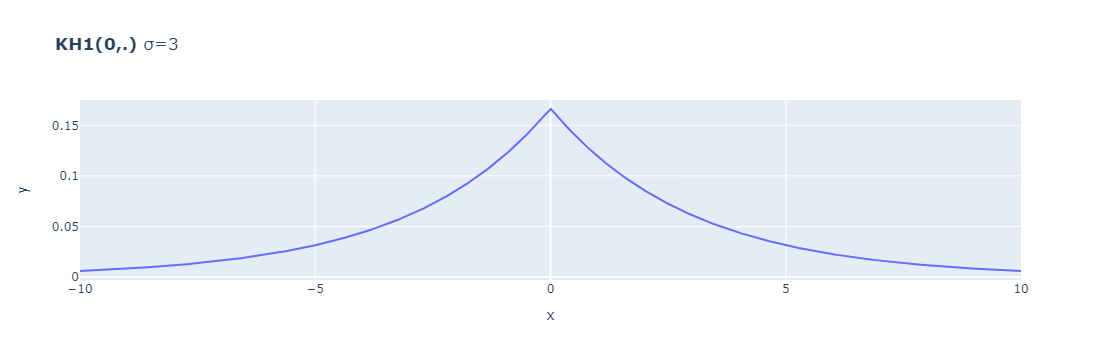

In [2]:
def KH1(x, y, σ = 1):
    """fonction pour definir le noyau
    Params:
        x : np.array (n , d)
        y : np.array (n , d)
        σ : float
    Returns:
       np.array
    """
    return np.exp(-np.abs(x - y) / σ) / (2 * σ)

########
# Test #
########

for σ in range(1,4):
    kernel_from_origin = np.vectorize( lambda y: KH1(0, y, σ = σ) )
    px.line( x=np.linspace(-10, 10, 1000), y=kernel_from_origin(np.linspace(-10, 10, 1000)), title=f"<b>KH1(0,.)</b> σ={σ}").show()

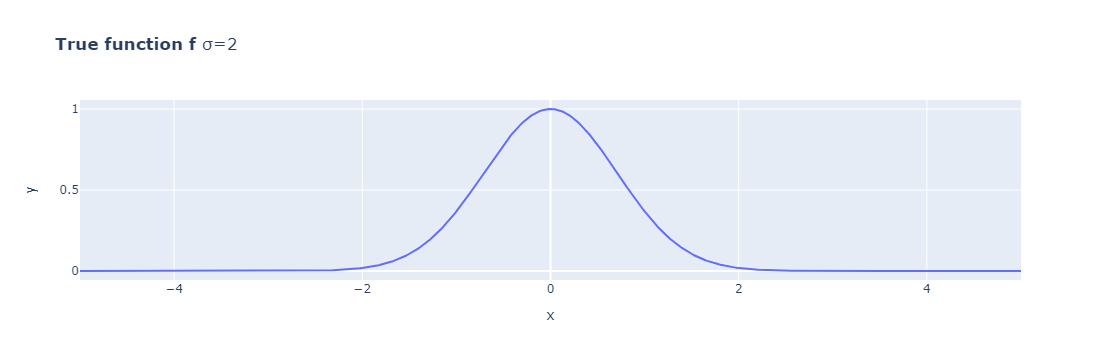

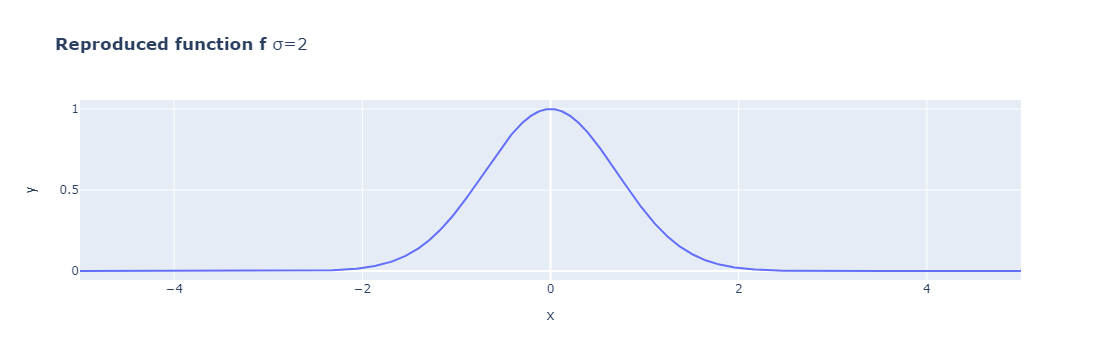

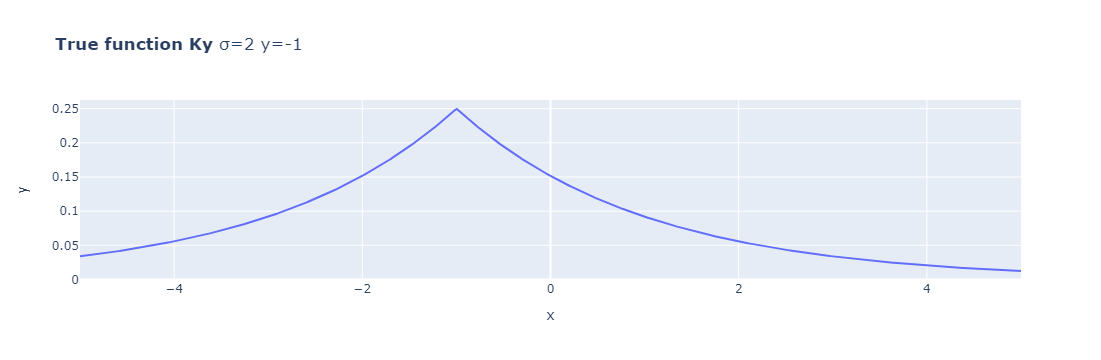

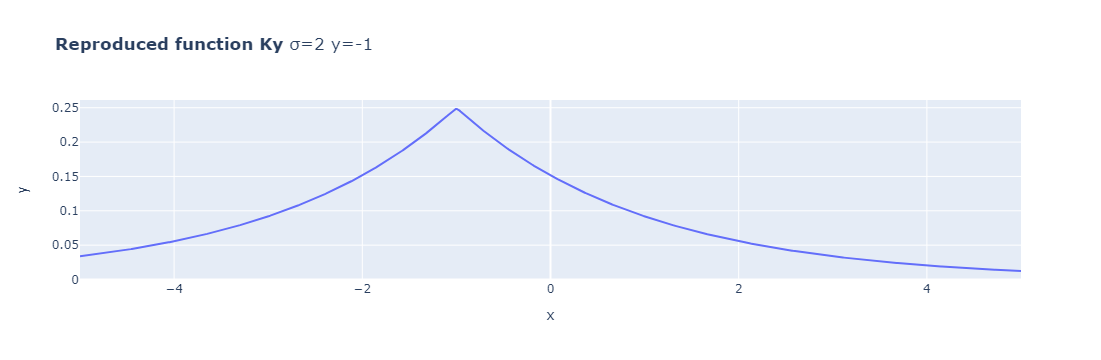

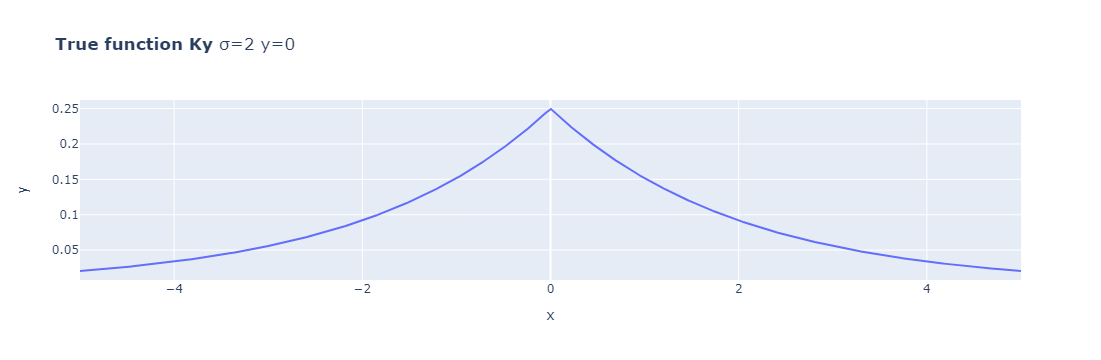

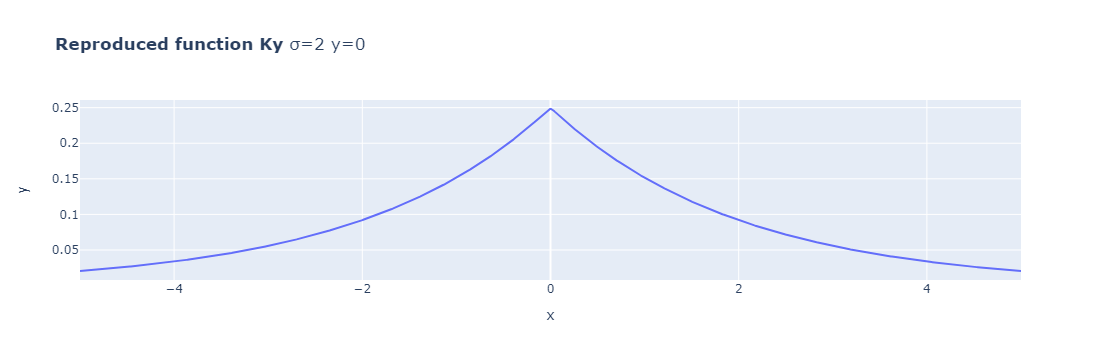

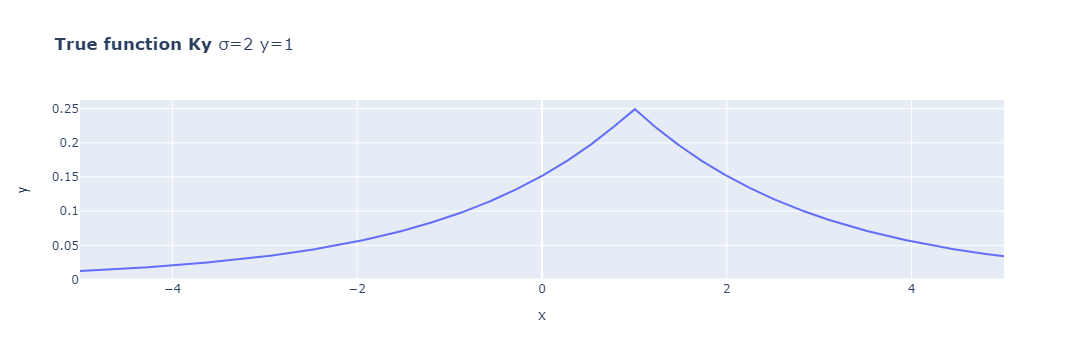

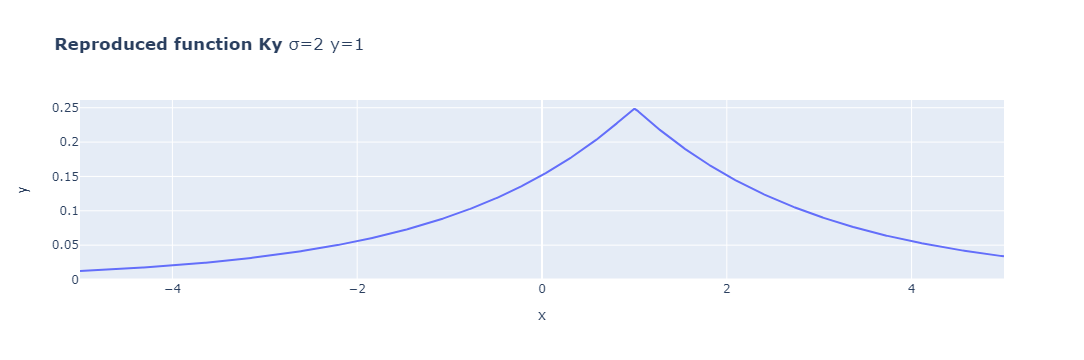

In [3]:
def H1ScalProd(f, g, σ = 1):
    """fonction pour définir le produit scalaire

    Params:
        f : function
        g : function
        σ : float

    Returns
        <f,g>_H1
    """
    # On définit le maillage du paramètre d'intergration et le pas de discrétisation
    x = np.linspace(-10, 10, 1000)
    dx = x[1] - x[0]
    # On calcule les valeurs des fonctions en chaque point
    arr_f, arr_g = f(x), g(x)
    # Puis on calcule les dérivés première discrétisé dans un schéma explicite
    arr_df = np.gradient(arr_f, dx)
    arr_dg = np.gradient(arr_g, dx)
    # On calcule les termes dans l'intégrale sur le maillage en utiklisant la définition du produit scalaire
    in_integ = arr_f * arr_g + (σ ** 2) * arr_df * arr_dg
    # on renvoie l'approximation de l'intergrale par la méthode des rectangle
    # qui est simplement la somme discrète des valeurs fois le pas d'intégration
    return np.sum(in_integ) * dx

##########
# Test 1 #
##########

# la fonction à reproduire
f = np.vectorize(lambda x: np.exp(- x ** 2))
# sa discrétisation
arr_x = np.linspace(-5, 5, 1000)
true_f = f(arr_x)

# on utilise le produit scalaire et le noyau pour reproduire les valeurs de f
reproduced_f = np.zeros_like(arr_x)
for i in range(1000):
    g = np.vectorize(lambda x: KH1(x, arr_x[i], 2))
    reproduced_f[i] = H1ScalProd(f, g, 2)

# on visualise
px.line( x=arr_x, y=true_f, title=f"<b>True function f</b> σ=2").show()
px.line( x=arr_x, y=reproduced_f, title=f"<b>Reproduced function f</b> σ=2").show()

##########
# Test 2 #
##########

for y in [-1,0,1]:
    # la fonction à reproduire
    f_y = np.vectorize(lambda x: KH1(x, y, 2))
    # sa discrétisation
    arr_x = np.linspace(-5, 5, 1000)
    true_fy = f_y(arr_x)
    
    # on utilise le produit scalaire et le noyau pour reproduire les valeurs de f
    reproduced_fy = np.zeros_like(arr_x)
    for i in range(1000):
        g = np.vectorize(lambda x: KH1(x, arr_x[i], 2))
        reproduced_fy[i] = H1ScalProd(f_y, g, 2)
    
    # on visualise
    px.line( x=arr_x, y=true_fy, title=f"<b>True function Ky</b> σ=2 y={y}").show()
    px.line( x=arr_x, y=reproduced_fy, title=f"<b>Reproduced function Ky</b> σ=2 y={y}").show()


On remarque que σ influence le kurtosis de la distribution.

### Problème d'interpolation scalaire

Le noyau $K_H$ permet de résoudre le problème d'interpolation suivant:

$$\left\{\begin{array}{l}
\text{Minimiser }\left\|f\right\|_H\text{ pour }f\in H,
\\ \text{sous les contraintes }f(y_i)=c_i,\quad 1\leq i\leq n
\end{array}\right.
$$

où $y_i\in{\mathbb R}^d, c_i\in$ sont fixés. La solution de ce problème est donnée par
$$f^*(x)=\sum_{j=1}^nK_H(x,y_j)a_j,$$
où les $a_j\in{\mathbb R}$ sont solutions du système linéaire

$$\forall i,\quad 1\leq i\leq n,\quad\sum_{j=1}^nK_H(y_i,y_j)a_j=c_i.$$

Ces équations peuvent s'écrire sous forme condensée: notons ${\bf y}=(y_1,\ldots,y_n)\in{\mathbb R}^{dn}$, $\boldsymbol{a}=(a_1,\ldots,a_n)\in{\mathbb R}^{n}$, ${\bf c}=(c_1,\ldots,c_n)\in{\mathbb R}^{n}$, et $K_H({\bf y},{\bf y})\in\mathcal{M}_{n}({\mathbb R})$ la matrice des $K_H(y_i,y_j)$ pour $1\leq i,j\leq n$. Le système linéaire à résoudre s'écrit alors

$$K_H({\bf y},{\bf y}){\bf a}={\bf c}.$$

De même, l'évaluation de la solution $f^*$ en des points $x_i\in{\mathbb R}^d, 1\leq i\leq p$ s'écrit

$${\bf f}^*({\bf x})=K_H({\bf x},{\bf y}){\bf a},$$

où ${\bf x}=(x_1,\ldots,x_p)\in{\mathbb R}^{dp}$, ${\bf f}^*({\bf x})=(f^*(x_1),\ldots,f^*(x_p))$, et $K_H({\bf x},{\bf y})\in\mathcal{M}_{p,n}({\mathbb R})$ est la matrice des $K_H(x_i,y_j)$ pour $1\leq i\leq p$, $1\leq j\leq n$.

<br>
<br>

__Question 3__ : Ecrire une fonction
`KernelMatrix(x,y,h)` qui construit
la matrice $K_H({\bf x},{\bf y})$ pour des points ${\bf x}\in{\mathbb R}^{pd}$, ${\bf y}\in{\mathbb R}^{nd}$ quelconques (supposés entrés sous forme de tableaux $p\times d$ et $n\times d$), et un noyau de la forme $K_H(x,y)=h\left(\|x-y\|\right)$, où $h$ est une fonction scalaire.

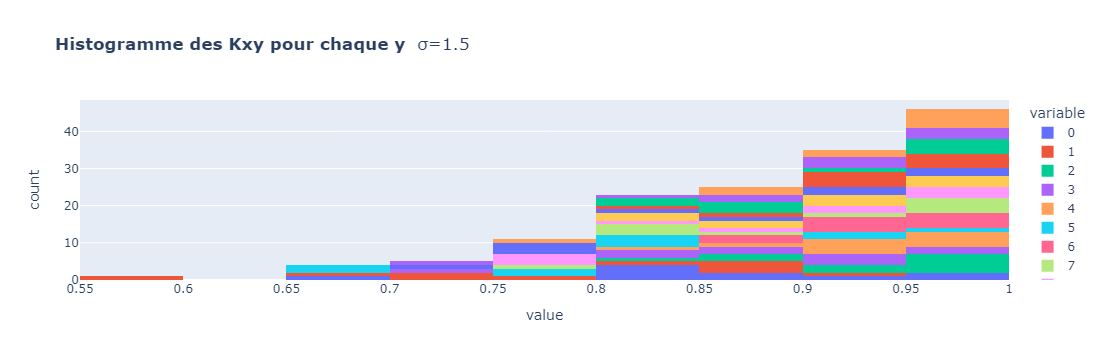

In [4]:
def KernelMatrix(x,y,h):
    """fonction pour la matrice des distances
    
    Params:
        x : np.array
        y : np.array
        h : function

    Returns
        matrix
    """
    p,d = x.shape
    n = y.shape[0]
    # broadcasting trick!
    x = np.reshape(x,(p,1,d))
    y = np.reshape(y,(1,n,d))
    D = np.linalg.norm(x-y,axis=2) # matrix of the ||xi-yj||, of shape (p,n)
    return h(D)
    
##########
# Test 1 #
##########
x = np.random.rand(10,2)        # 10 points tirés aléatoirement dans [0,1]^2
y = np.random.rand(15,2)        # 15 points tirés aléatoirement dans [0,1]^2
σ = 1.5                     # échelle du noyau

def gauss(sigma):
    def f(u):
        return np.exp(-u**2/sigma**2)
    return f

Kxy = KernelMatrix(x,y,gauss(σ))

px.histogram( Kxy, title=f"<b>Histogramme des Kxy pour chaque y </b> σ={σ}").show()

L'ordre de grandeurs du noyaux correspond bien à des valeurs en entrée entre 0 et 1.

<br>
<br>

__Question 4__ : Ecrire une fonction
`Interp(x,y,c,h)`
qui résout le problème d'interpolation $f(y_i)=c_i$, $1\leq i\leq n$ et renvoie l'évaluation de la solution aux points $x_i$, $1\leq i\leq p$`

<br>

__Question 5__ : Tester la fonction `Interp` tout d'abord avec $d=1$:

<br>

Tester ensuite le même problème en changeant l'échelle du noyau : on prendra ainsi $h(u)=e^{-u^2/\sigma^2}$ pour $\sigma\in\{0.2,2,4,10\}$. Afficher sur le même graphique les différentes solutions. Tester également l'interpolation avec des noyaux de Cauchy : $h(u)=\frac1{1+u^2/\sigma^2}$.

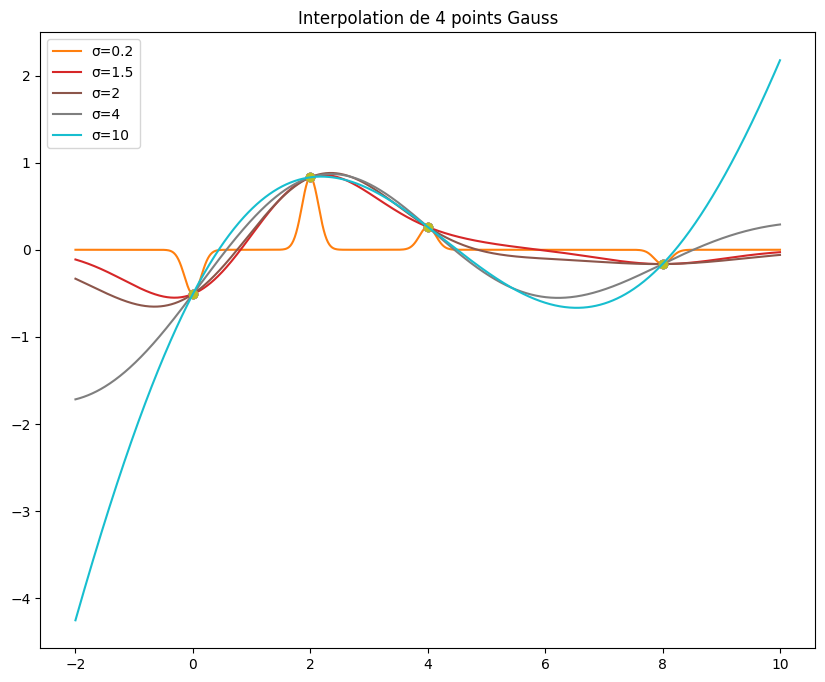

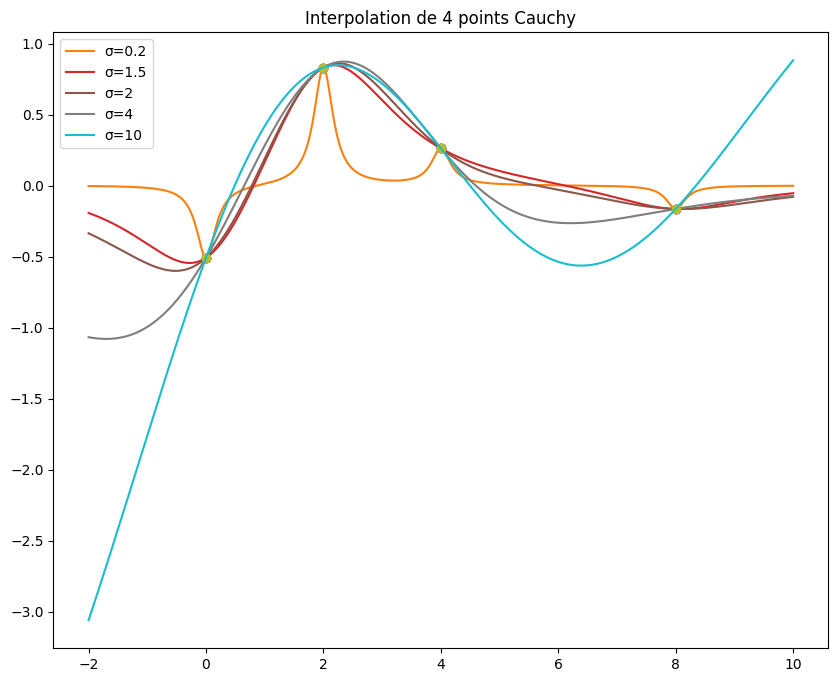

In [5]:
def Interp(x,y,c,h):
    # define the linear system and solve
    Kyy = KernelMatrix(y,y,h)
    a = np.linalg.solve(Kyy,c)
    # apply to compute values at x
    return KernelMatrix(x,y,h)@a

def cauchy(sigma):
    def f(u):
        return 1/(1+u**2/sigma**2)
    return f

##########
# Test 1 #
##########
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
for σ in [0.2,1.5,2,4,10]:
    x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
    fx = Interp(x,y,c,gauss(σ))         # calcul de l'interpolation
    plt.title(f"Interpolation de 4 points Gauss")
    plt.plot(y,c,'o')                       # affichage
    plt.plot(x,fx, label = f"σ={σ}")
plt.legend()
plt.show()


##########
# Test 2 #
##########
# On recommence avec un noyau de Cauchy
plt.clf()
for σ in [0.2,1.5,2,4,10]:
    x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
    fx = Interp(x,y,c,cauchy(σ))         # calcul de l'interpolation
    plt.title(f"Interpolation de 4 points Cauchy")
    plt.plot(y,c,'o')                       # affichage
    plt.plot(x,fx, label = f"σ={σ}")
plt.legend()
plt.show()

On remarque que le paramètre σ influence la localité de l'interpolation: plus sigma est petit plus l'interpolation est locale.
Aussi on constate un changement radicale de comportement autour de σ=1: l'interpolation est proche d'une interpolation polynomiale pour σ > 1 et est parcimonieuse quand σ<1. Par parcimonieux on entend que les valeurs sont nulles pour des points éloignées de nos valeurs d'entrée.
Aussi le comportement avec un noyau de Cauchy n'est pas radicalement différent proche des données interpolées. On s'attend tout de même à observer des différences sur les queux de distributions en raison de la queue épaisse de la loi de Cauchy.

<br>
<br>

__Question 6__ : Effectuer l'interpolation avec un noyau $K_\sigma$ de la première partie, et vérifier numériquement
que la norme dans $H^1_\sigma$ de la solution est toujours inférieure à la norme d'autres fonctions de $H^1_\sigma$ passant par les points (par exemple les solutions du problème d'interpolation avec d'autres noyaux).

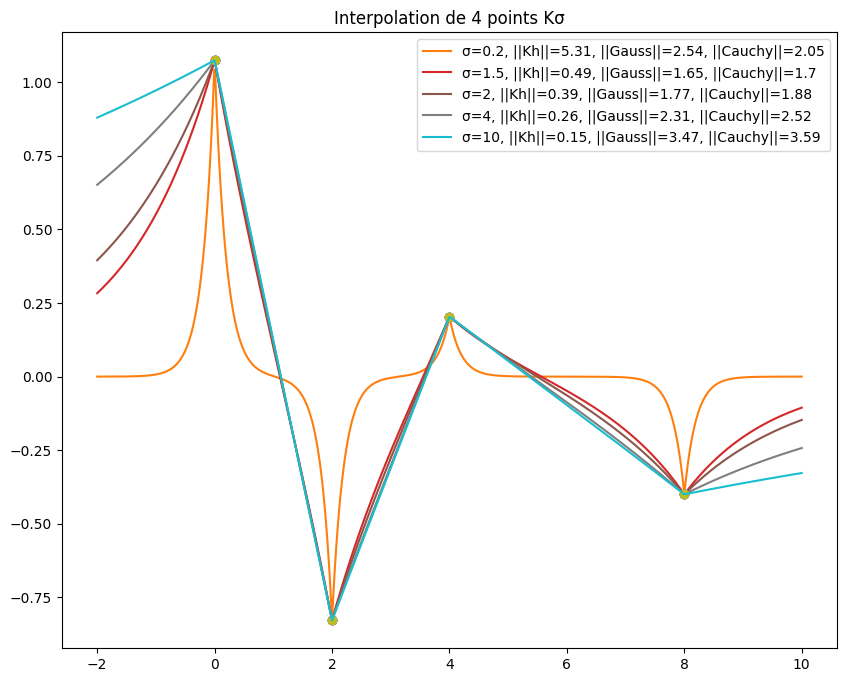

In [6]:
def ker(σ):
    def f(u):
        return np.exp(-np.abs(u) / σ) / (2 * σ)
    return f

def norme_function(f, σ):
    return np.sqrt(H1ScalProd(f, f, σ = 1))


y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1
c = np.random.randn(4,1)                # valeurs tirées aléatoirement
for σ in [0.2,1.5,2,4,10]:
    x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
    fx = Interp(x,y,c,ker(σ))         # calcul de l'interpolation
    #On calcule les normes
    nKh = np.round(norme_function(ker(σ), σ), 2)
    nGau= np.round(norme_function(gauss(σ), σ), 2)
    nCau= np.round(norme_function(cauchy(σ), σ), 2)
    plt.title(f"Interpolation de 4 points Kσ")
    plt.plot(y,c,'o')                       # affichage

    plt.plot(x,fx, label = f"σ={σ}, ||Kh||={nKh}, ||Gauss||={nGau}, ||Cauchy||={nCau}")
plt.legend()
plt.show()

La norme est toujours inférieure dans le cas ou σ>1

<br>
<br>

__Question 7__ : Tester à présent l'interpolation dans le cas $d=2$: choisir par exemple $10$ points $y_i$ dans $[0,1]^2$ et des réels $c_i$ tirés aléatoirement, puis évaluer sur une grille uniforme de $100*100$ points que l'on construira avec la commande suivante : `X1, X2 = np.meshgrid(t,t)`

Si les valeurs interpolées sont dans le tableau `fX` de taille $100*100$, on affichera ensuite la solution avec

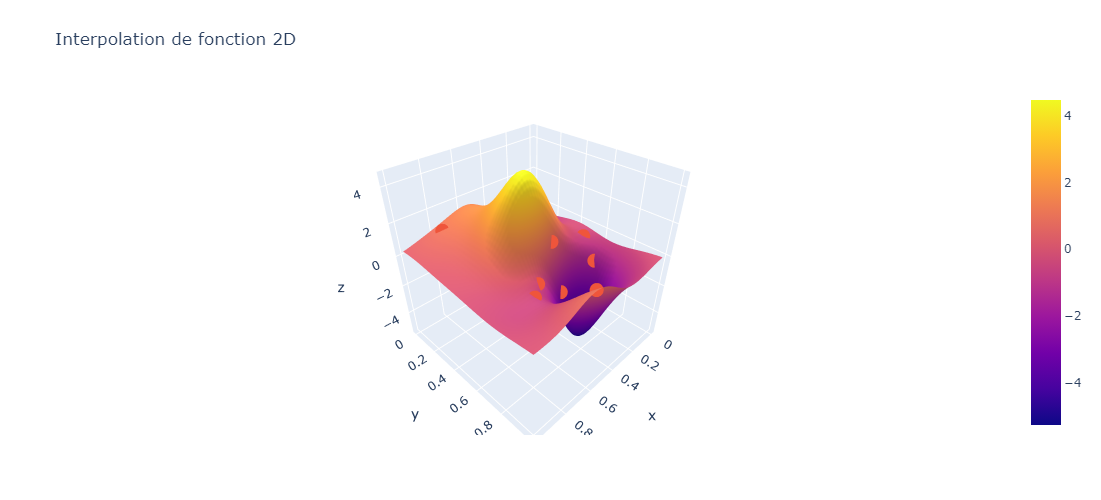

In [34]:
def InterpGrid(X1,X2,y,c,h):
    p,q = X1.shape
    # define the linear system and solve
    Kyy = KernelMatrix(y,y,h)
    a = np.linalg.solve(Kyy,c)
    # build the x array:
    x = np.concatenate((X1.reshape(p*q,1),X2.reshape(p*q,1)),axis=1)
    # apply to compute values at x
    res = KernelMatrix(x,y,h)@a
    return np.reshape(res,(p,q))

##########
# Test 1 #
##########

n = 10
d = 2
sigma = .25
y = np.random.rand(n,d)    # 10 points tirés aléatoirement dans [0,1]^2
c = np.random.randn(n,1)   # 10 valeurs aléatoires
t = np.linspace(0,1,50)
X1, X2 = np.meshgrid(t,t)  # grille uniforme de 50*50 points
Z = InterpGrid(X1,X2,y,c,gauss(sigma))

fig = go.Figure(data=[go.Surface(x=X1,y=X2,z=Z)])

fig.update_layout(title='Interpolation de fonction 2D', autosize=False,
                  width=1000, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.add_scatter3d(x=y[:,0],y=y[:,1],z=c[:,0], mode="markers")


On retrouve encore une interpolation assez lisse.

<br>
<br>

### Interpolation relaxée

Dans certains cas, les contraintes d'interpolation peuvent s'avérer trop fortes pour la norme de Hilbert utilisée (typiquement lorsque le paramètre d'échelle $\sigma$ est grand par rapport aux positions des points d'interpolation). Numériquement ceci se traduit par une matrice d'interpolation très mal conditionnée. D'autre part les données d'observation peuvent être bruitées, auquel cas une fonction passant exactement par les contraintes n'est plus désirable. Une solution consiste alors à écrire un problème d'interpolation relaxé (_smoothing spline interpolation_) :

$$\text{Minimiser }\quad\lambda\left\|f\right\|_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2,$$
où $\lambda>0$ est un paramètre à fixer.

<br>

__Question 8__ : Montrer que la solution de l'interpolation inexacte s'obtient en rajoutant $\lambda$ aux coefficients diagonaux de la matrice du système linéaire.

Comme par le kernel trick:

$$f(x)=\sum_{j=1}^nK(x,y_j)a_j,$$

On a donc:
$$
\begin{aligned}
Φ(f) & =\lambda\|f\|_H^2+\sum_{i=1}^n\left(f\left(y_i\right)-c_i\right)^2 \\
& =\lambda \sum_{i=1}^n  \sum_{j=1}^n a_i K\left(y_i, y_j\right) a_j+\sum_{i=1}^n\left(c_i-\sum_{j=1}^n K\left(y_i, y_j\right) a_j\right)^2
\end{aligned}
$$

L'objectif est strictement convexe et différentiable, aussi le problème d'optimisation est non contraint. Ainsi on a existence et unicité de la solution, et par condition du premier ordre:
$$
0 = \nabla_{a_k} Φ(f)= 2 \lambda \sum_{i=1}^n K\left(y_i, y_k\right) a_i +2 \left(-K\left(y_k, y_i\right) \right) \sum_{i=1}^n\left(c_i-\sum_{j=1}^n K\left(y_i, y_j\right) a_j\right)
$$

Puis:
$$
\forall i, 1 \leq i \leq n,\left(\lambda+\sum_{j=1}^n K\left(y_i, y_j\right)\right) a_j=c_i
$$

D'où $( K + \lambda I d) a=c$.

<br>

Modifier les fonctions précédentes pour prendre en compte ce nouveau modèle, et le tester sur les exemples précédents et sur l'exemple suivant :
```
y = np.linspace(0,1,30)[:,None]
c = np.cos(6*y) + .05*np.random.randn(30,1)
```
avec $h(u)=e^{-u^2/\sigma^2}$ et les jeux de paramètres suivants : $\sigma\in\{0.1,0.25\}, \lambda\in\{0,0.1\}$.

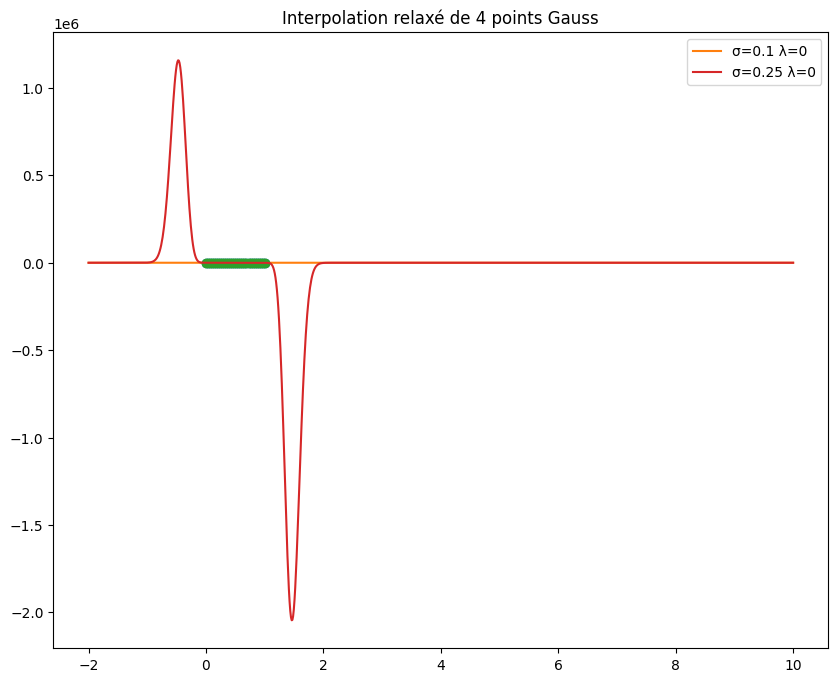

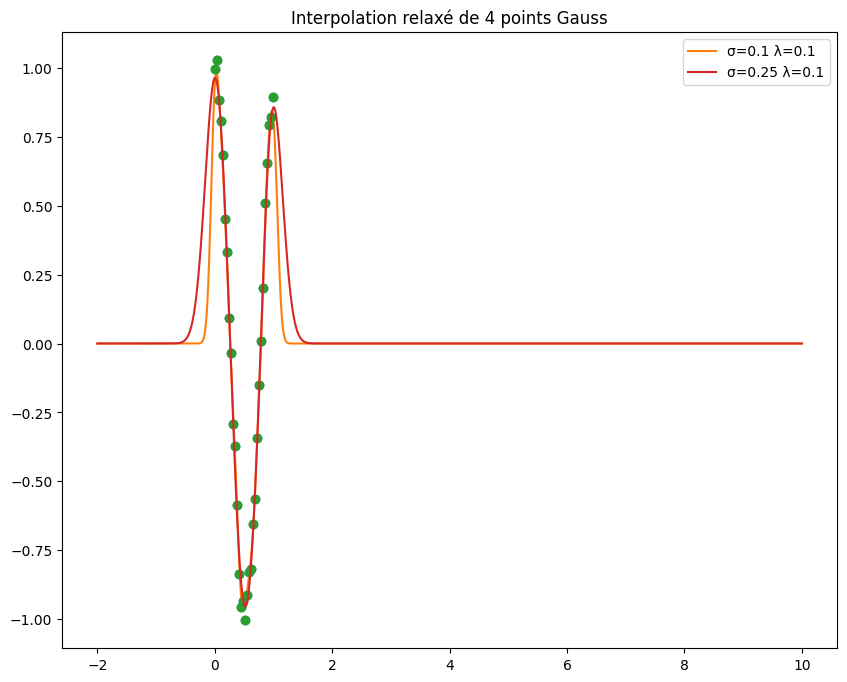

In [8]:
def Interp_relax(x,y,c,h,λ=0):
    # define the linear system and solve
    Kyy_λ = KernelMatrix(y,y,h)+λ*np.eye(y.shape[0])
    a = np.linalg.solve(Kyy_λ,c)
    # apply to compute values at x
    return KernelMatrix(x,y,h)@a

##########
# Test 1 #
##########
n = 300
y = np.linspace(0,1,n)[:,None]
c = np.cos(6*y) + .05*np.random.randn(n,1)

for λ in [0,0.1]:
    plt.clf()
    for σ in [0.1,0.25]:
        x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation
        fx = Interp_relax(x,y,c,gauss(σ), λ=λ)         # calcul de l'interpolation
        plt.title(f"Interpolation relaxé de 4 points Gauss")
        plt.plot(y,c,'o')                       # affichage
        plt.plot(x,fx, label = f"σ={σ} λ={λ}")
    plt.legend()
    plt.show()



La régularisation a pour effet de limiter l'amplitude de l'interpolation, améliorant ainsi la robustesse de la regression.

<br>
<br>

### Problème d'interpolation vectorielle

On suppose à présent que $V$ est un espace de Hilbert de fonctions à valeurs vectorielles $v:{\mathbb R}^d\rightarrow{\mathbb R}^m$.
S'il existe, le noyau reproduisant $K_V$ de l'espace $V$ est alors une application ${\mathbb R}^d\times{\mathbb R}^d\rightarrow\mathcal{M}_m({\mathbb R})$, définie par la relation:

$$ \forall v\in V,\forall x\in{\mathbb R}^d,\forall \alpha\in{\mathbb R}^m,\quad\langle{v(x)},{\alpha}\rangle=\langle{K_V(\cdot,x)\alpha},v\rangle_V.$$

La propriété reproduisante s'écrit alors

$$ \forall x,y\in{\mathbb R}^d,\forall \alpha,\beta\in{\mathbb R}^m,\quad\left\langle {K_V(\cdot,x)\alpha},{K_V(\cdot,y)\beta}\right\rangle_V=\langle{K_V(x,y)\beta},{\alpha}\rangle.$$

On considère le problème exact d'interpolation vectorielle suivant:

$$\text{Minimiser }\left\| v\right\|_V\text{ pour $v\in V$, sous les contraintes }v(y_i)=\gamma_i,$$

où $y_i\in{\mathbb R}^d, \gamma_i\in{\mathbb R}^m$ sont fixés, $1\leq i\leq n$. On considère aussi le problème relaxé associé :

$$\text{Minimiser }λ\|v\|_V^2+\sum_{i=1}^n\|v(y_i)-\gamma_i\|^2,$$

__Question 9__ : Montrer que pour un noyau de la forme $K_V(x,y)=h(\|x-y\|)I_m$, les problèmes d'interpolation vectoriels exacts et relaxés sont équivalents à $m$ problèmes d'interpolation scalaires
avec le noyau scalaire $K_H(x,y)=h(\|x-y\|)$ (on supposera que ce noyau $K_H$ est bien le noyau reproduisant d'un espace de Hilbert $H$ de fonctions scalaires).

D'après les définitions on a $\|v\|_V^2 = \sum_{i=1}^n \|v_i\|_H^2$ où $v_i$ est l'application coordonnée.
On remarque alors que l'objectif est la somme des objectifs du cas précédent pour chaque dimension de sortie, et que l'on peut appliquer le kernel trick sur chaque $v_i$. 
L'objectifs est alors strictement convexe différentiable comme somme de fonctions strictement convexe différentiable et en appliquant la condition du premier ordre, on a un gradient nul pour chaque scalaire associé aux kernel trick ce qui revient au système précédent pour chaque $v_i$.

<br>

Si besoin, modifier la fonction `Interp` pour qu'elle puisse aussi résoudre les problèmes d'interpolation vectorielle.

In [102]:
# Il suffit de concatener les différentes dimensions avant d'utiliser les poids de regressions comme dans le cas InterpGrid2D

<br>

__Question 10__ : Tester la fonction `Interp` avec $d=m=2$: générer des points $y_i$ dans $[0,1]^2$ (commencer avec $n=3$), des vecteurs $\gamma_i$ avec la commande `gamma = 0.05*np.random.randn(n,d)` puis évaluer sur une grille uniforme de taille 20*20. Afficher le champ de vecteurs obtenu avec la fonction `quiver` de Matplotlib.

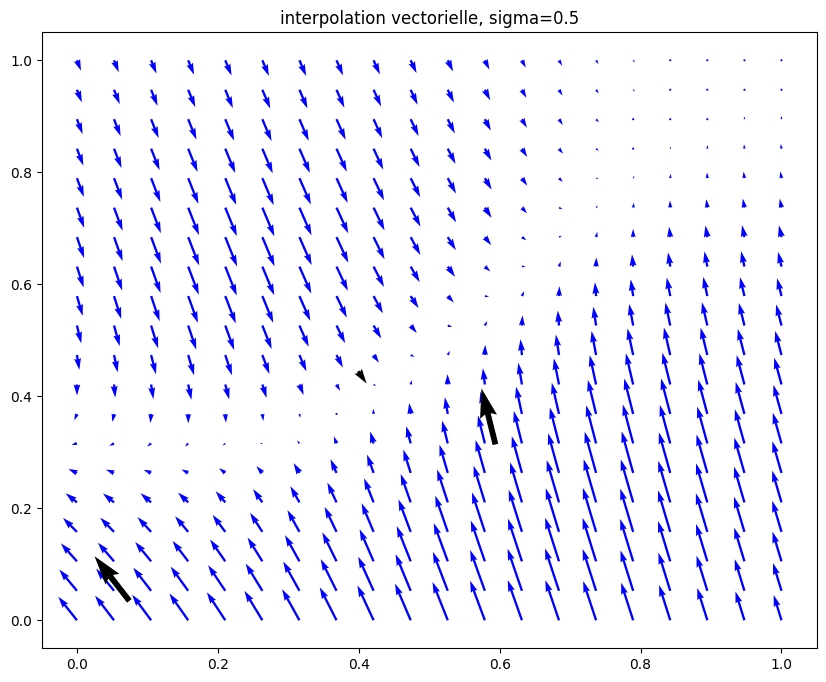

In [83]:
def InterpGrid2D(X1,X2,y,c,h) :
    p,q = X1.shape
    # define the linear system and solve
    Kyy = KernelMatrix(y,y,h)
    a = np.linalg.solve(Kyy,c)
    # build the x array:
    x = np.concatenate((X1.reshape(p*q,1),X2.reshape(p*q,1)),axis=1)
    # apply to compute values at x
    res = KernelMatrix(x,y,h)@a
    res = np.reshape(res,(p,q,2))
    return res[:,:,0], res[:,:,1]
    
##########
# Test 1 #
##########
n = 3
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
gamma = 0.05*np.random.randn(n,m)
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
plt.title("interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1])

On remarque que le flow est smooth interpole bien les trois vecteurs.


<br>
<br>

## Appariement de points labellisés

### Appariement linéaire

Le problème d'interpolation vectorielle précédent, pour $d=m$, peut être vu comme un problème d'appariement de points. Pour la version "exacte", ceci s'écrit :
$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

On se ramène simplement au problème précédent en posant $\gamma_i=z_i-y_i$.

<br>

__Question 11__ : On se place dans le plan ($d=m=2$). Reprendre l'exemple de la question précédente, en affichant cette fois dans un même graphique les points $y_i$ et $z_i$ et visualiser la solution $\phi$ en calculant et en affichant le déplacement d'une grille de points.

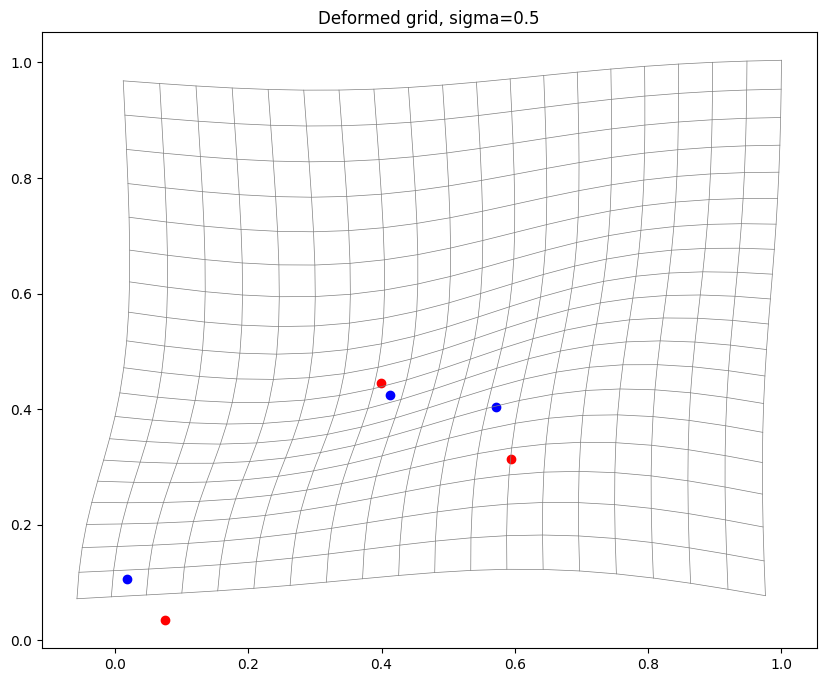

In [84]:
##########
# Test 1 #
##########

plt.title("Deformed grid, sigma="+str(sigma))
plt.scatter(y[:,0],y[:,1],color='r')
plt.scatter(y[:,0] + gamma[:,0],y[:,1] + gamma[:,1],color='b');

X1_deformed = X1 + V1
X2_deformed = X2 + V2

plt.plot(X1_deformed, X2_deformed, color='gray', linestyle='-', linewidth=0.5)
plt.plot(X1_deformed.T, X2_deformed.T, color='gray', linestyle='-', linewidth=0.5)
plt.show()

<br>

__Question 12__ : Charger le fichiers `hand1.mat` et `hand2.mat` avec les commandes :

In [39]:
import scipy.io
C1 = scipy.io.loadmat('hand1.mat')['C1']
C2 = scipy.io.loadmat('hand2.mat')['C2']

Les tableaux `C1` et `C2`
contiennent les coordonnées de deux contours de mains. Avec le code suivant, sélectionner des points de référence (extrémités des doigts, etc.) pour chacun :

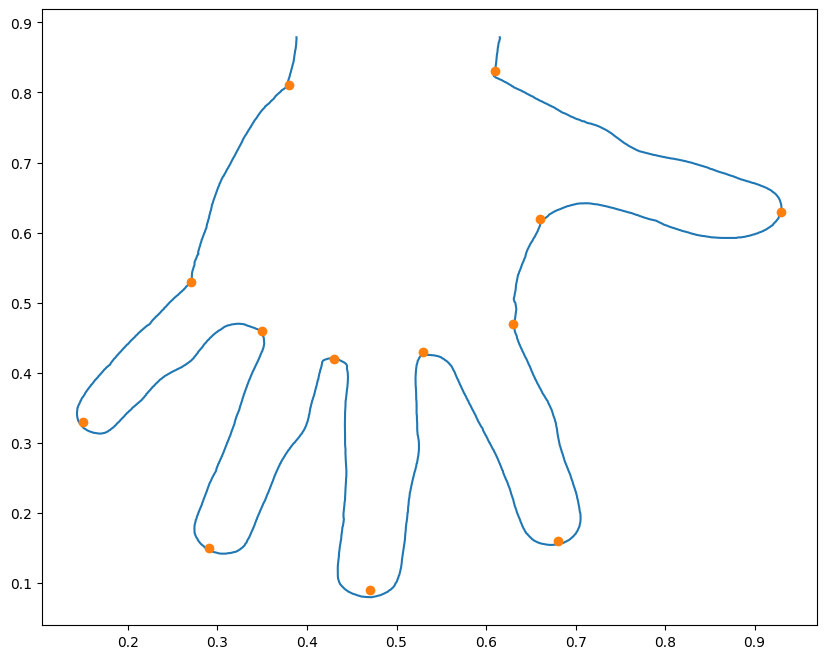

y= [[0.61 0.83]
 [0.93 0.63]
 [0.66 0.62]
 [0.63 0.47]
 [0.68 0.16]
 [0.53 0.43]
 [0.47 0.09]
 [0.43 0.42]
 [0.29 0.15]
 [0.35 0.46]
 [0.15 0.33]
 [0.27 0.53]
 [0.38 0.81]]


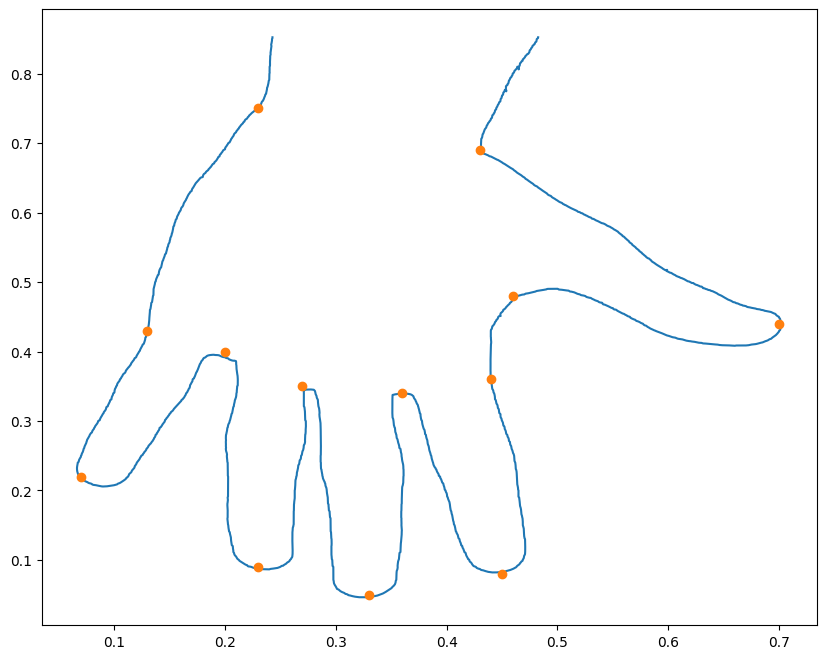

z= [[0.43 0.69]
 [0.7  0.44]
 [0.46 0.48]
 [0.44 0.36]
 [0.45 0.08]
 [0.36 0.34]
 [0.33 0.05]
 [0.27 0.35]
 [0.23 0.09]
 [0.2  0.4 ]
 [0.07 0.22]
 [0.13 0.43]
 [0.23 0.75]]


In [85]:
do_ginput = False
plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(C1[:,0],C1[:,1])
if do_ginput:
    plt.title("Sélectionner les points y_i puis appuyer sur Entrée")
    y = np.array(plt.ginput(0))
else:
    y= np.array([[0.61,0.83],[0.93,0.63],[0.66,0.62],[0.63,0.47],[0.68,0.16],[0.53,0.43],
                 [0.47,0.09],[0.43,0.42],[0.29,0.15],[0.35,0.46],[0.15,0.33],[0.27,0.53],[0.38,0.81]])
plt.plot(y[:,0],y[:,1],'o')
plt.show()
print("y=",y)

plt.figure()
plt.plot(C2[:,0],C2[:,1])
if do_ginput:
    plt.title("Sélectionner les points z_i puis appuyer sur Entrée")
    z = np.array(plt.ginput(0))
else:
    z = np.array([[0.43,0.69],[0.70,0.44],[0.46,0.48],[0.44,0.36],[0.45,0.08],[0.36,0.34],
                  [0.33,0.05],[0.27,0.35],[0.23,0.09],[0.20,0.40],[0.07,0.22],[0.13,0.43],[0.23,0.75]])
plt.plot(z[:,0],z[:,1],'o')
plt.show()
print("z=",z)

<br>

Réaliser l'appariement des deux ensembles de points puis afficher sur un même graphique la courbe $C_2$ et ses points de référence, la courbe transformée $\phi(C_1)$ et le déplacement d'une grille de points.

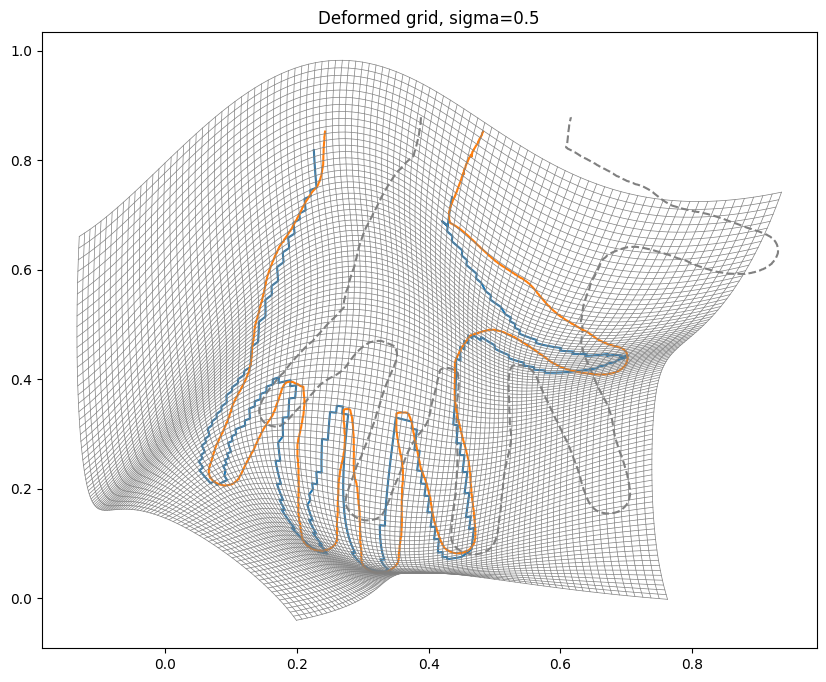

In [101]:
gamma = z-y
n = 100
t = np.arange(0,1,1/n)
X1, X2 = np.meshgrid(t,t)

V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
X1_deformed = X1 + V1
X2_deformed = X2 + V2

φ_C1_1 = np.zeros_like(C1[:,0])
φ_C1_2 = np.zeros_like(C1[:,1])
f_round=lambda v: np.round(v, len(str(n)))

for i in range(C1.shape[0]):
    val_1 = f_round(C1[i,0])
    val_2 = f_round(C1[i,1])
    idx_1 = int(val_1*n)
    idx_2 = int(val_2*n)
    # print(idx_1, idx_2)
    φ_C1_1[i] = X1_deformed[idx_2, idx_1]
    φ_C1_2[i] = X2_deformed[idx_2, idx_1]

plt.title("Deformed grid, sigma="+str(sigma))
plt.plot(C1[:,0],C1[:,1],color='gray', linestyle='--')
plt.plot(φ_C1_1, φ_C1_2)
plt.plot(C2[:,0],C2[:,1])
plt.plot(X1_deformed, X2_deformed, color='gray', linestyle='-', linewidth=0.5)
plt.plot(X1_deformed.T, X2_deformed.T, color='gray', linestyle='-', linewidth=0.5)
plt.show()

<br>
<br>

## Ajout des déplacements affines et modèle Thin Plate Splines

Il est possible d'ajouter au modèle les déplacements affines. Le problème d'appariement exact devient alors:

$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)+Bx+c
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

où $B$ est une matrice carrée de taille $d$ et $c$ un vecteur. On peut montrer que le champ de vecteur optimal s'écrit toujours comme une combinaison linéaire des noyaux $K_V(\cdot,y_i)$.

<br>

__Question 13__ : Trouver le système linéaire à résoudre pour obtenir les coefficients des vecteurs $\alpha_i$, $c$, et de la matrice $B$ (_indication : considérer les conditions de Karush-Kuhn-Tucker à l'optimum pour obtenir les équations manquantes_), puis implémenter cet appariement. Reprendre l'exemple des contours de mains avec ce nouveau modèle.

<br>

__Question 14__ : Tester à présent ce nouveau modèle avec le noyau $h(r)=r^2\log(r)$. Ce noyau n'est pas de type positif mais semi-positif, et n'est utilisable qu'en incluant les transformations affines. C'est le modèle de spline "plaque mince" (TPS: Thin Plate Splines).